In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import os
import time
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Activation, Flatten, GlobalMaxPooling2D, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import GlobalAveragePooling2D, Dense, ReLU

In [3]:
data_path = '/content/drive/My Drive/transfer_learning_data/cat_dog_horse_human/'
X_train = np.load(data_path+'x_train.npy').astype(float)
Y_train = np.load(data_path+'y_train.npy').astype(float)
X_test = np.load(data_path+'x_test.npy').astype(float)
Y_test = np.load(data_path+'y_test.npy').astype(float)

In [4]:
num_classes = 4
names = ['cats', 'dogs', 'horses', 'humans']

In [5]:
print('Training Data: {}'.format(X_train.shape))
print('Test Data: {}'.format(X_test.shape))

Training Data: (646, 224, 224, 3)
Test Data: (162, 224, 224, 3)


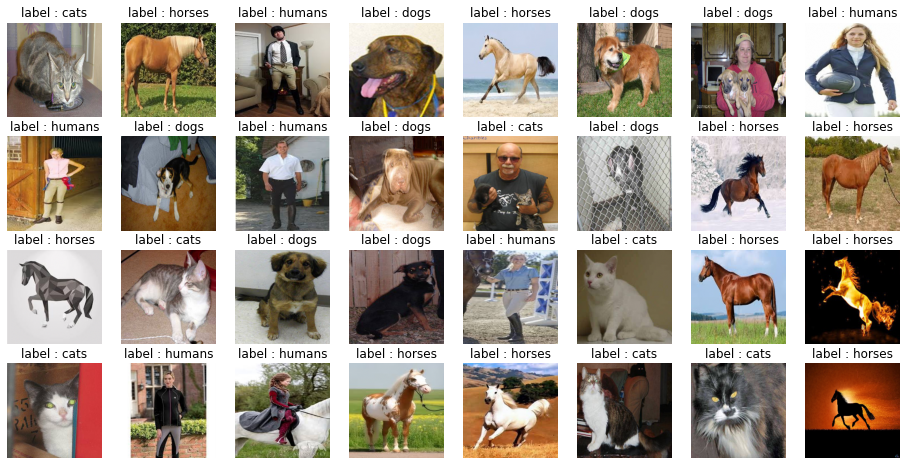

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
for k in range(32):
    img = X_train[k]
    label = Y_train[k]
    plt.subplot(4,8,1+k)
    plt.imshow(img)
    plt.axis('off')
    plt.title('label : {0}'.format(names[np.argmax(label)]))
plt.show()

In [7]:
model = MobileNetV2(include_top=True, weights='imagenet')
model.summary()

14540800/14536120 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________

In [8]:
x = Dense(num_classes, activation='softmax', name='predictions')(model.layers[-2].output)
custom_mobilenetv2_model = Model(model.input, x)

for layer in custom_mobilenetv2_model.layers[:-3]:
	layer.trainable = False

custom_mobilenetv2_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

custom_mobilenetv2_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [9]:
n_epochs = 50
n_batch = 32

In [10]:
# from keras.callbacks import EarlyStopping
# es = EarlyStopping()
t=time.time()
#	t = now()
# hist = custom_vgg_model.fit(X_train, Y_train, batch_size=n_batch, epochs=n_epochs, verbose=1, validation_data=(X_test, Y_test), callbacks=[es])
hist = custom_mobilenetv2_model.fit(X_train, Y_train, batch_size=n_batch, epochs=n_epochs, verbose=1, validation_data=(X_test, Y_test))
print('Training time: %s' % (t - time.time()))

Epoch 1/50
21/21 [==============================] - 4s 167ms/step - loss: 0.6918 - accuracy: 0.7539 - val_loss: 0.2699 - val_accuracy: 0.9444
Epoch 2/50
21/21 [==============================] - 2s 96ms/step - loss: 0.1537 - accuracy: 0.9628 - val_loss: 0.1539 - val_accuracy: 0.9506
Epoch 3/50
21/21 [==============================] - 2s 96ms/step - loss: 0.0914 - accuracy: 0.9799 - val_loss: 0.1282 - val_accuracy: 0.9630
Epoch 4/50
21/21 [==============================] - 2s 96ms/step - loss: 0.0641 - accuracy: 0.9923 - val_loss: 0.1129 - val_accuracy: 0.9691
Epoch 5/50
21/21 [==============================] - 2s 96ms/step - loss: 0.0482 - accuracy: 0.9954 - val_loss: 0.1047 - val_accuracy: 0.9691
Epoch 6/50
21/21 [==============================] - 2s 96ms/step - loss: 0.0404 - accuracy: 0.9969 - val_loss: 0.0984 - val_accuracy: 0.9753
Epoch 7/50
21/21 [==============================] - 2s 95ms/step - loss: 0.0310 - accuracy: 0.9985 - val_loss: 0.0965 - val_accuracy: 0.9753
Epoch 8/50
2

In [12]:
(loss, accuracy) = custom_mobilenetv2_model.evaluate(X_test, Y_test, batch_size=n_batch, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

6/6 [==============================] - 0s 67ms/step - loss: 0.0758 - accuracy: 0.9753
[INFO] loss=0.0758, accuracy: 97.5309%


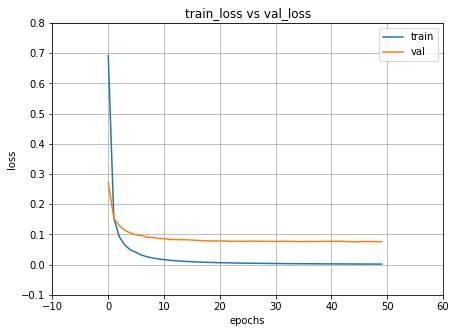

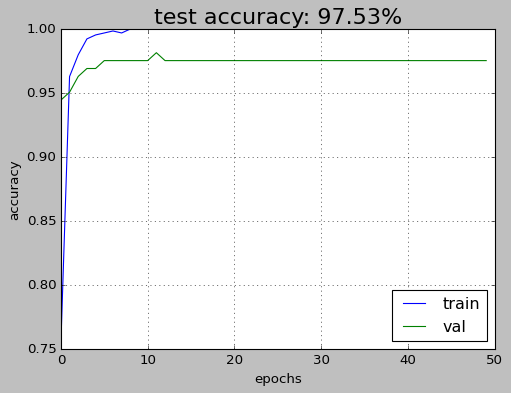

In [13]:
import matplotlib.pyplot as plt
% matplotlib inline
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(len(train_loss))

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('test accuracy: {:.2f}%'.format(accuracy*100), fontsize=20)
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()